# 👥 Customer Dataset EDA - Phân Tích Hành Vi Khách Hàng

## 🎯 Mục Tiêu
Phân tích khám phá dữ liệu khách hàng để hiểu:
- Customer demographics và behavior patterns
- Customer segmentation và RFM analysis
- Purchase patterns và preferences
- Customer lifetime value (CLV)
- Churn prediction insights

## 📋 Dataset Overview
- **Nguồn**: Synthetic Customer Analytics Data
- **Thời gian**: 2 năm (2022-2023)
- **Features**: Customer_ID, Age, Gender, Location, Income, Purchase_History, RFM_Scores
- **Mục tiêu**: Customer segmentation, RFM analysis, behavioral insights

## 🔍 Kỹ Thuật Sẽ Sử Dụng
- Customer segmentation (K-means clustering)
- RFM Analysis (Recency, Frequency, Monetary)
- Customer Lifetime Value calculation
- Behavioral pattern analysis
- Demographic analysis
- Purchase journey mapping


In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Cài đặt style cho plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Đã import thành công tất cả thư viện!")
print("👥 Sẵn sàng bắt đầu phân tích Customer Dataset!")


✅ Đã import thành công tất cả thư viện!
👥 Sẵn sàng bắt đầu phân tích Customer Dataset!


## 📊 Bước 1: Tạo Synthetic Customer Dataset

Tạo dataset khách hàng tổng hợp với các đặc điểm thực tế:
- 5000+ khách hàng với demographics đa dạng
- Purchase history trong 2 năm
- RFM scores (Recency, Frequency, Monetary)
- Customer behavior patterns
- Geographic distribution


In [ ]:
# Tạo synthetic customer dataset
np.random.seed(42)

# Thông tin cơ bản
n_customers = 5000
start_date = '2022-01-01'
end_date = '2023-12-31'

# Demographics
genders = ['Male', 'Female', 'Other']
locations = ['Urban', 'Suburban', 'Rural']
age_groups = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']

# Tạo customer data
customer_data = []

for i in range(n_customers):
    customer_id = f"CUST_{i+1:05d}"
    
    # Demographics
    gender = np.random.choice(genders, p=[0.48, 0.50, 0.02])
    location = np.random.choice(locations, p=[0.60, 0.30, 0.10])
    age_group = np.random.choice(age_groups, p=[0.15, 0.25, 0.20, 0.20, 0.15, 0.05])
    
    # Age từ age group
    age_ranges = {'18-25': (18, 25), '26-35': (26, 35), '36-45': (36, 45), 
                  '46-55': (46, 55), '56-65': (56, 65), '65+': (65, 80)}
    age = np.random.randint(age_ranges[age_group][0], age_ranges[age_group][1] + 1)
    
    # Income based on age and location
    base_income = {
        '18-25': 30000, '26-35': 50000, '36-45': 70000, 
        '46-55': 80000, '56-65': 75000, '65+': 45000
    }
    
    location_multiplier = {'Urban': 1.2, 'Suburban': 1.0, 'Rural': 0.8}
    income = base_income[age_group] * location_multiplier[location] * np.random.uniform(0.7, 1.5)
    
    # Customer behavior patterns
    # Purchase frequency (transactions per month)
    if age_group in ['18-25', '26-35']:
        freq_base = np.random.poisson(3)  # Younger customers shop more
    elif age_group in ['36-45', '46-55']:
        freq_base = np.random.poisson(2)  # Middle-aged customers
    else:
        freq_base = np.random.poisson(1)  # Older customers shop less
    
    # Average transaction value
    if income > 80000:
        avg_transaction = np.random.uniform(150, 500)
    elif income > 50000:
        avg_transaction = np.random.uniform(80, 200)
    else:
        avg_transaction = np.random.uniform(30, 100)
    
    # Customer lifetime (months since first purchase)
    lifetime_months = np.random.randint(1, 25)  # 1-24 months
    
    # Total transactions
    total_transactions = freq_base * lifetime_months
    
    # Total spent
    total_spent = total_transactions * avg_transaction * np.random.uniform(0.8, 1.2)
    
    # Recency (days since last purchase)
    if np.random.random() < 0.1:  # 10% churned customers
        recency_days = np.random.randint(90, 365)
    else:
        recency_days = np.random.randint(1, 90)
    
    # RFM Scores (1-5 scale)
    # Recency Score (1 = recent, 5 = old)
    if recency_days <= 30:
        recency_score = 5
    elif recency_days <= 60:
        recency_score = 4
    elif recency_days <= 90:
        recency_score = 3
    elif recency_days <= 180:
        recency_score = 2
    else:
        recency_score = 1
    
    # Frequency Score (1 = low, 5 = high)
    if total_transactions >= 50:
        frequency_score = 5
    elif total_transactions >= 30:
        frequency_score = 4
    elif total_transactions >= 15:
        frequency_score = 3
    elif total_transactions >= 5:
        frequency_score = 2
    else:
        frequency_score = 1
    
    # Monetary Score (1 = low, 5 = high)
    if total_spent >= 10000:
        monetary_score = 5
    elif total_spent >= 5000:
        monetary_score = 4
    elif total_spent >= 2000:
        monetary_score = 3
    elif total_spent >= 500:
        monetary_score = 2
    else:
        monetary_score = 1
    
    # Customer segment based on RFM
    rfm_score = recency_score * 100 + frequency_score * 10 + monetary_score
    
    if rfm_score >= 444:
        segment = "Champions"
    elif rfm_score >= 333:
        segment = "Loyal Customers"
    elif rfm_score >= 222:
        segment = "Potential Loyalists"
    elif rfm_score >= 111:
        segment = "New Customers"
    else:
        segment = "At Risk"
    
    # Additional features
    preferred_category = np.random.choice(['Electronics', 'Fashion', 'Home', 'Sports'], 
                                        p=[0.3, 0.4, 0.2, 0.1])
    
    # Customer satisfaction (1-5 scale)
    satisfaction = np.random.normal(4.0, 0.8)
    satisfaction = max(1, min(5, satisfaction))
    
    # Referral likelihood
    referral_likelihood = np.random.beta(2, 5)  # Most customers unlikely to refer
    
    customer_data.append({
        'Customer_ID': customer_id,
        'Age': age,
        'Age_Group': age_group,
        'Gender': gender,
        'Location': location,
        'Income': round(income, 2),
        'Total_Transactions': total_transactions,
        'Total_Spent': round(total_spent, 2),
        'Avg_Transaction_Value': round(avg_transaction, 2),
        'Lifetime_Months': lifetime_months,
        'Recency_Days': recency_days,
        'Recency_Score': recency_score,
        'Frequency_Score': frequency_score,
        'Monetary_Score': monetary_score,
        'RFM_Score': rfm_score,
        'Customer_Segment': segment,
        'Preferred_Category': preferred_category,
        'Satisfaction_Score': round(satisfaction, 2),
        'Referral_Likelihood': round(referral_likelihood, 3),
        'Is_Churned': recency_days > 90
    })

# Tạo DataFrame
df = pd.DataFrame(customer_data)

print(f"✅ Đã tạo thành công Customer Dataset!")
print(f"👥 Số lượng khách hàng: {len(df):,}")
print(f"💰 Tổng doanh thu: ${df['Total_Spent'].sum():,.2f}")
print(f"📊 Tổng số giao dịch: {df['Total_Transactions'].sum():,}")
print(f"📈 Tỷ lệ churn: {df['Is_Churned'].mean()*100:.1f}%")


✅ Đã tạo thành công Customer Dataset!
👥 Số lượng khách hàng: 5,000
💰 Tổng doanh thu: $23,771,235.69
📊 Tổng số giao dịch: 134,439
📈 Tỷ lệ churn: 9.8%


## 📊 Bước 2: Data Loading & Overview


In [ ]:
# Kiểm tra thông tin cơ bản về dataset
print("🔍 THÔNG TIN CƠ BẢN VỀ CUSTOMER DATASET")
print("=" * 50)
print(f"📊 Shape: {df.shape}")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📋 COLUMNS INFO:")
print("=" * 30)
print(df.info())

print("\n🔢 DATA TYPES:")
print("=" * 20)
print(df.dtypes)

print("\n📊 SAMPLE DATA (5 rows đầu):")
print("=" * 35)
df.head()


🔍 THÔNG TIN CƠ BẢN VỀ CUSTOMER DATASET
📊 Shape: (5000, 20)
💾 Memory usage: 2.96 MB

📋 COLUMNS INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            5000 non-null   object 
 1   Age                    5000 non-null   int64  
 2   Age_Group              5000 non-null   object 
 3   Gender                 5000 non-null   object 
 4   Location               5000 non-null   object 
 5   Income                 5000 non-null   float64
 6   Total_Transactions     5000 non-null   int64  
 7   Total_Spent            5000 non-null   float64
 8   Avg_Transaction_Value  5000 non-null   float64
 9   Lifetime_Months        5000 non-null   int64  
 10  Recency_Days           5000 non-null   int64  
 11  Recency_Score          5000 non-null   int64  
 12  Frequency_Score        5000 non-null   int64  
 13  Monetary

,Customer_ID,Age,Age_Group,Gender,Location,Income,Total_Transactions,Total_Spent,Avg_Transaction_Value,Lifetime_Months,Recency_Days,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Customer_Segment,Preferred_Category,Satisfaction_Score,Referral_Likelihood,Is_Churned
0,CUST_00001,50,46-55,Male,Rural,52788.15,4,630.66,183.94,4,53,4,1,2,412,Loyal Customers,Sports,3.62,0.411,False
1,CUST_00002,55,46-55,Male,Urban,70783.92,24,3722.02,154.21,12,3,5,3,3,533,Champions,Home,3.26,0.096,False
2,CUST_00003,19,18-25,Female,Urban,44905.91,28,867.86,32.41,14,4,5,3,2,532,Champions,Fashion,5.00,0.366,False
3,CUST_00004,27,26-35,Male,Urban,67905.22,28,2709.65,99.83,7,8,5,3,3,533,Champions,Electronics,4.14,0.270,False
4,CUST_00005,24,18-25,Male,Urban,49681.11,24,1432.11,55.96,24,86,3,3,2,332,Potential Loyalists,Home,3.17,0.222,False


In [ ]:
# Kiểm tra missing values và data quality
print("🔍 DATA QUALITY CHECK")
print("=" * 30)

# Missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})

print("Missing Values:")
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("✅ Không có missing values trong dataset!")

# Duplicate check
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate customers: {duplicates}")

# Unique values cho categorical columns
print("\n📊 UNIQUE VALUES:")
print("=" * 25)
categorical_cols = ['Gender', 'Location', 'Age_Group', 'Customer_Segment', 'Preferred_Category']
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")
    print(f"  Values: {list(df[col].unique())}")
    print()

# Data range check
print("📈 NUMERICAL RANGES:")
print("=" * 25)
numerical_cols = ['Age', 'Income', 'Total_Transactions', 'Total_Spent', 'Avg_Transaction_Value']
for col in numerical_cols:
    print(f"{col}: {df[col].min():.2f} - {df[col].max():.2f}")


🔍 DATA QUALITY CHECK
Missing Values:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []
✅ Không có missing values trong dataset!

🔄 Duplicate customers: 0

📊 UNIQUE VALUES:
Gender: 3 unique values
  Values: ['Male', 'Female', 'Other']

Location: 3 unique values
  Values: ['Rural', 'Urban', 'Suburban']

Age_Group: 6 unique values
  Values: ['46-55', '18-25', '26-35', '36-45', '56-65', '65+']

Customer_Segment: 4 unique values
  Values: ['Loyal Customers', 'Champions', 'Potential Loyalists', 'New Customers']

Preferred_Category: 4 unique values
  Values: ['Sports', 'Home', 'Fashion', 'Electronics']

📈 NUMERICAL RANGES:
Age: 18.00 - 80.00
Income: 16896.12 - 143955.39
Total_Transactions: 0.00 - 207.00
Total_Spent: 0.00 - 81547.81
Avg_Transaction_Value: 30.10 - 499.76


## 📊 Bước 3: Data Profiling


In [ ]:
# Statistical summary cho numerical columns
print("📊 STATISTICAL SUMMARY")
print("=" * 30)
numerical_cols = ['Age', 'Income', 'Total_Transactions', 'Total_Spent', 'Avg_Transaction_Value', 
                  'Lifetime_Months', 'Recency_Days', 'Satisfaction_Score', 'Referral_Likelihood']
print(df[numerical_cols].describe().round(2))

# Thêm một số thống kê bổ sung
print("\n📈 ADDITIONAL STATISTICS")
print("=" * 35)
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std: {df[col].std():.2f}")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")
    print(f"  Skewness: {df[col].skew():.3f}")
    print(f"  Kurtosis: {df[col].kurtosis():.3f}")


📊 STATISTICAL SUMMARY
           Age     Income  Total_Transactions  Total_Spent  \
count  5000.00    5000.00             5000.00      5000.00   
mean     42.16   74188.36               26.89      4754.25   
std      14.67   28325.48               28.18      6346.99   
min      18.00   16896.12                0.00         0.00   
25%      30.00   52011.31                6.00       708.09   
50%      41.00   71942.40               18.00      2638.03   
75%      53.00   93830.99               40.00      6225.19   
max      80.00  143955.39              207.00     81547.81   

       Avg_Transaction_Value  Lifetime_Months  Recency_Days  \
count                5000.00          5000.00       5000.00   
mean                  194.40            12.42         63.11   
std                   126.86             6.93         64.87   
min                    30.10             1.00          1.00   
25%                    93.23             6.00         25.00   
50%                   160.12            1

In [ ]:
# Phân tích categorical features
print("📊 CATEGORICAL FEATURES ANALYSIS")
print("=" * 40)

# Customer Segment analysis
print("\n👥 CUSTOMER SEGMENT ANALYSIS:")
print("-" * 35)
segment_stats = df.groupby('Customer_Segment').agg({
    'Total_Spent': ['count', 'sum', 'mean'],
    'Total_Transactions': 'mean',
    'Income': 'mean',
    'Satisfaction_Score': 'mean',
    'Is_Churned': 'mean'
}).round(2)
segment_stats.columns = ['Count', 'Total_Revenue', 'Avg_Revenue', 'Avg_Transactions', 'Avg_Income', 'Avg_Satisfaction', 'Churn_Rate']
segment_stats = segment_stats.sort_values('Total_Revenue', ascending=False)
print(segment_stats)

# Demographics analysis
print("\n👤 DEMOGRAPHICS ANALYSIS:")
print("-" * 30)

# Gender analysis
gender_stats = df.groupby('Gender').agg({
    'Total_Spent': ['count', 'sum', 'mean'],
    'Income': 'mean',
    'Satisfaction_Score': 'mean'
}).round(2)
gender_stats.columns = ['Count', 'Total_Revenue', 'Avg_Revenue', 'Avg_Income', 'Avg_Satisfaction']
print("Gender Distribution:")
print(gender_stats)

# Age Group analysis
age_stats = df.groupby('Age_Group').agg({
    'Total_Spent': ['count', 'sum', 'mean'],
    'Income': 'mean',
    'Satisfaction_Score': 'mean'
}).round(2)
age_stats.columns = ['Count', 'Total_Revenue', 'Avg_Revenue', 'Avg_Income', 'Avg_Satisfaction']
print("\nAge Group Distribution:")
print(age_stats)

# Location analysis
location_stats = df.groupby('Location').agg({
    'Total_Spent': ['count', 'sum', 'mean'],
    'Income': 'mean',
    'Satisfaction_Score': 'mean'
}).round(2)
location_stats.columns = ['Count', 'Total_Revenue', 'Avg_Revenue', 'Avg_Income', 'Avg_Satisfaction']
print("\nLocation Distribution:")
print(location_stats)


📊 CATEGORICAL FEATURES ANALYSIS

👥 CUSTOMER SEGMENT ANALYSIS:
-----------------------------------
                     Count  Total_Revenue  Avg_Revenue  Avg_Transactions  \
Customer_Segment                                                           
Champions             1962    12244239.78      6240.69             34.16   
Loyal Customers       1844     8453330.21      4584.24             26.59   
New Customers          381     1693449.71      4444.75             24.25   
Potential Loyalists    813     1380215.99      1697.68             11.26   

                     Avg_Income  Avg_Satisfaction  Churn_Rate  
Customer_Segment                                               
Champions              74949.45              3.96        0.00  
Loyal Customers        73507.11              3.96        0.00  
New Customers          75520.89              3.98        1.00  
Potential Loyalists    73272.36              3.94        0.14  

👤 DEMOGRAPHICS ANALYSIS:
------------------------------
Gend

## 📊 Bước 4: Missing Value Analysis


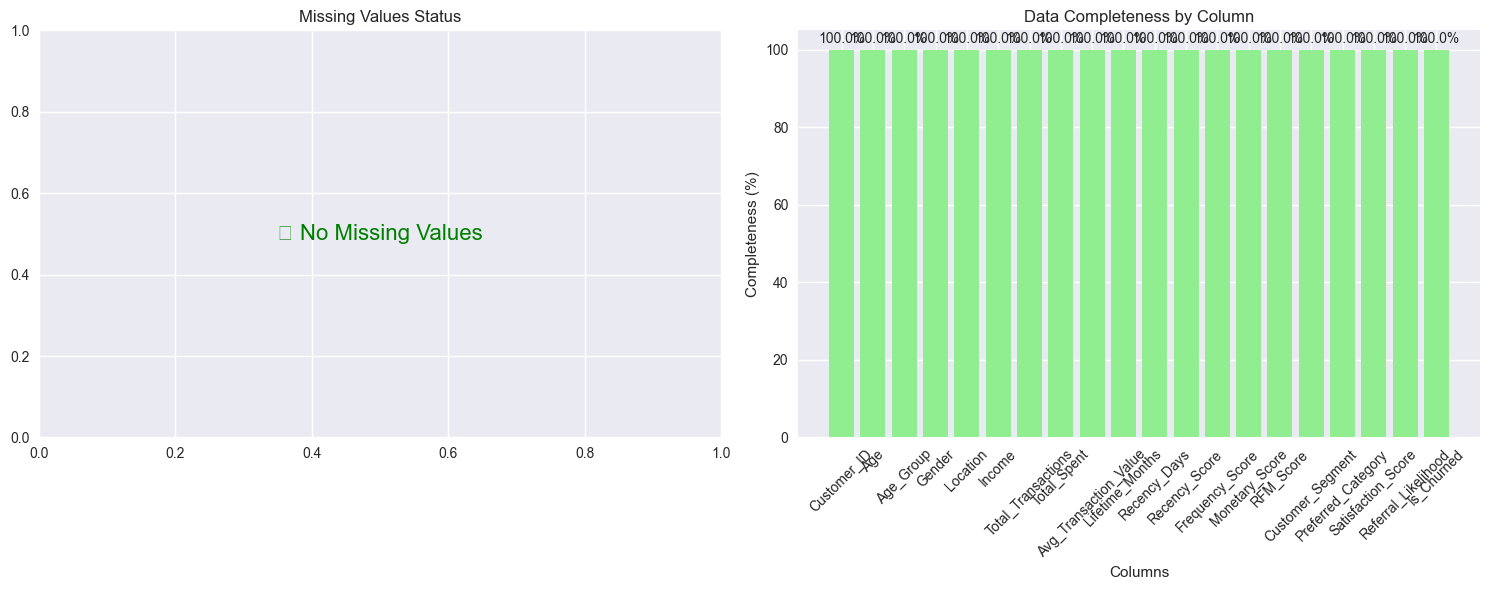

✅ Dataset hoàn toàn clean - không có missing values!
📊 Tất cả 5000 khách hàng có đầy đủ thông tin!


In [ ]:
# Missing value visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Missing value heatmap
missing_data = df.isnull().sum()
if missing_data.sum() > 0:
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=axes[0])
    axes[0].set_title('Missing Values Heatmap')
else:
    axes[0].text(0.5, 0.5, '✅ No Missing Values', ha='center', va='center', 
                transform=axes[0].transAxes, fontsize=16, color='green')
    axes[0].set_title('Missing Values Status')

# Data completeness
completeness = (1 - missing_data / len(df)) * 100
bars = axes[1].bar(range(len(completeness)), completeness.values, color='lightgreen')
axes[1].set_title('Data Completeness by Column')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Completeness (%)')
axes[1].set_xticks(range(len(completeness)))
axes[1].set_xticklabels(completeness.index, rotation=45)
axes[1].set_ylim(0, 105)

# Add percentage labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("✅ Dataset hoàn toàn clean - không có missing values!")
print("📊 Tất cả 5000 khách hàng có đầy đủ thông tin!")


## 📊 Bước 5: Univariate Analysis


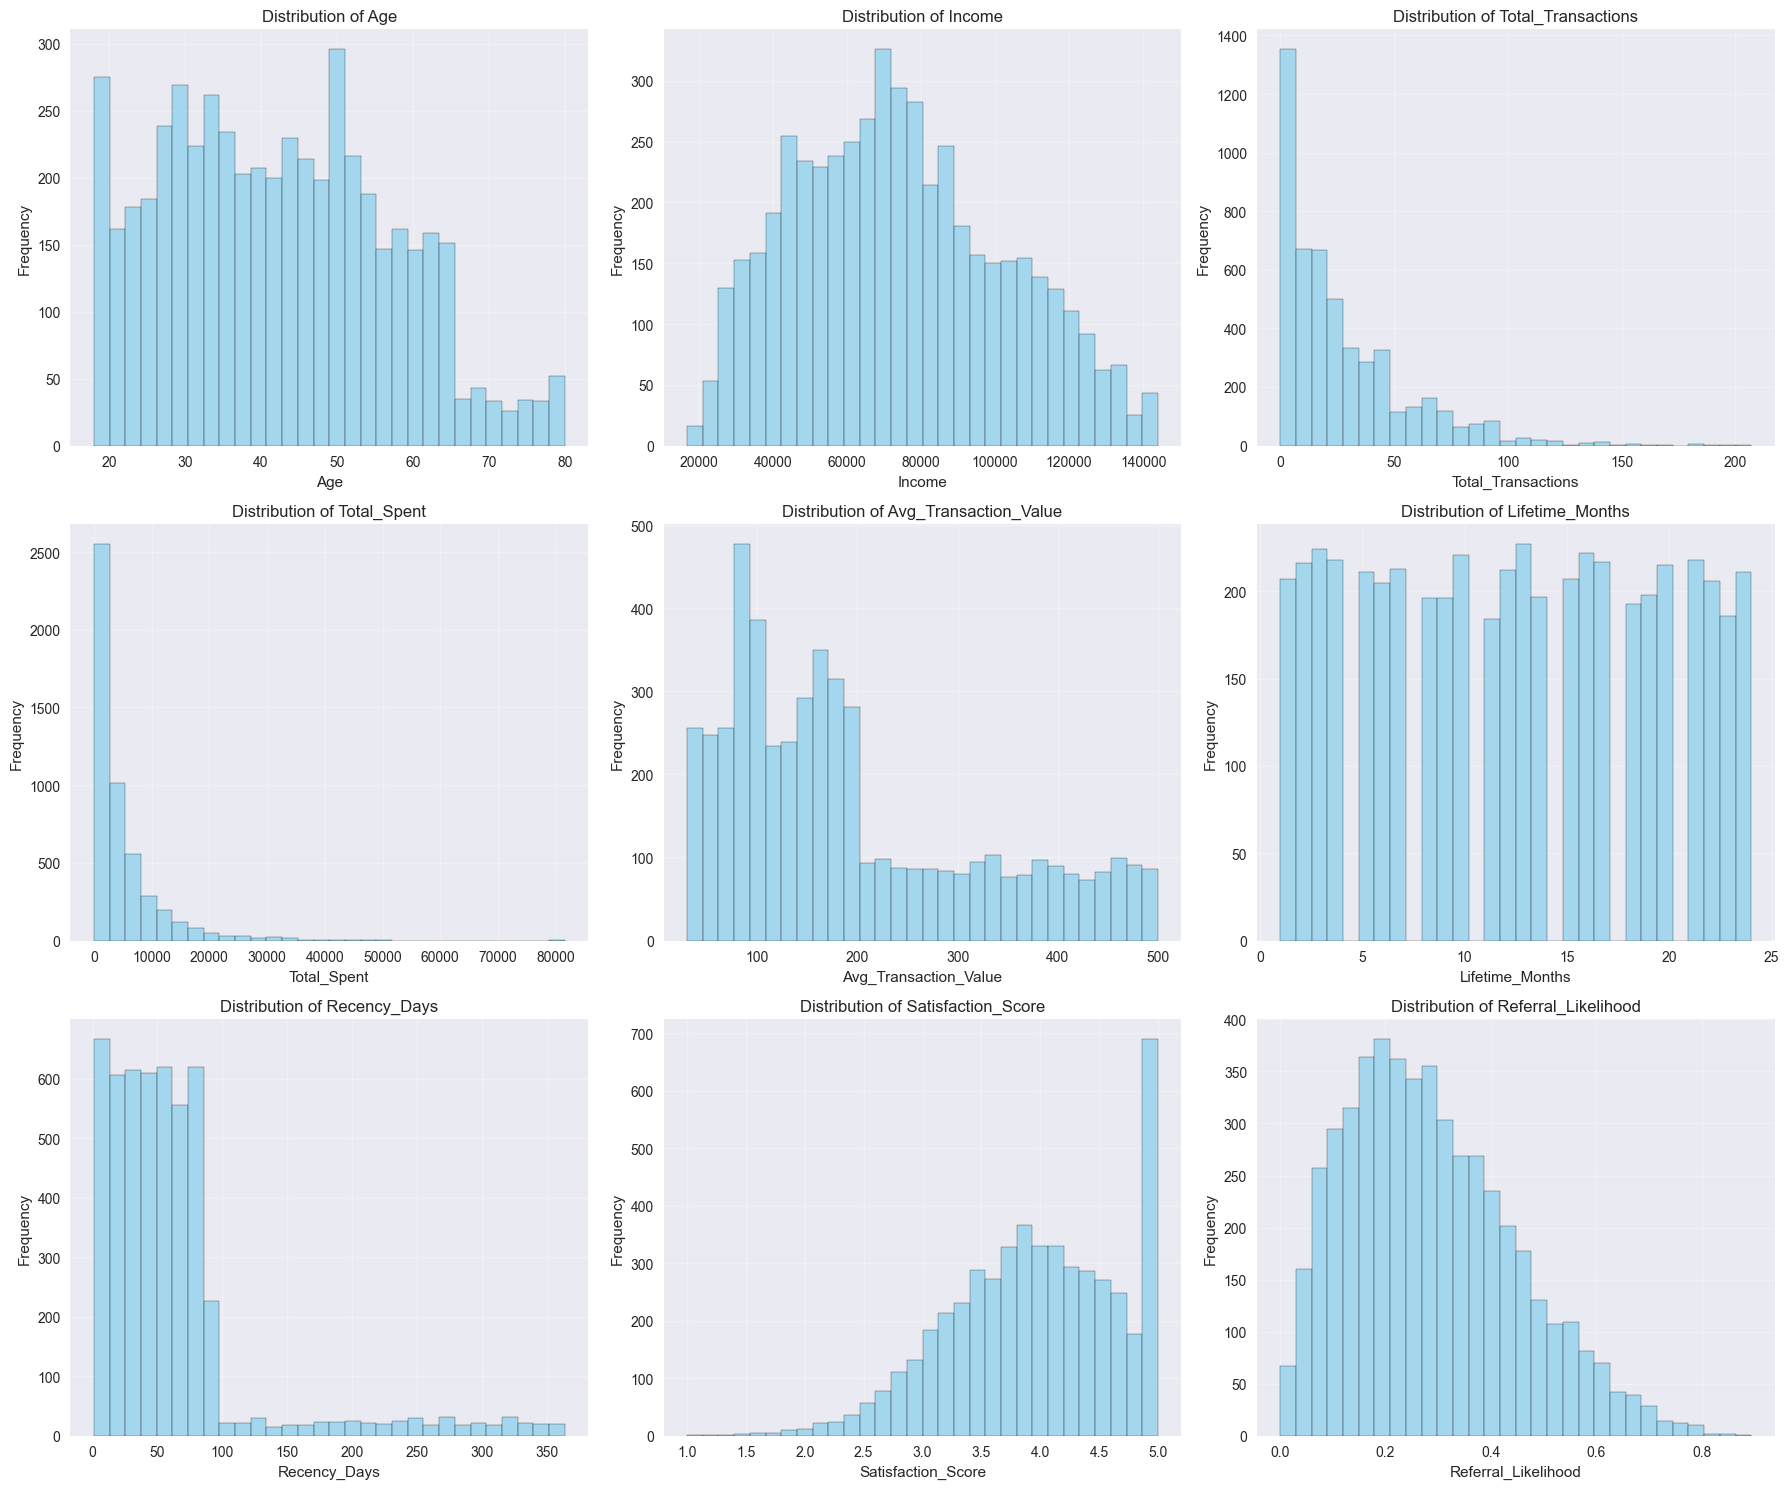

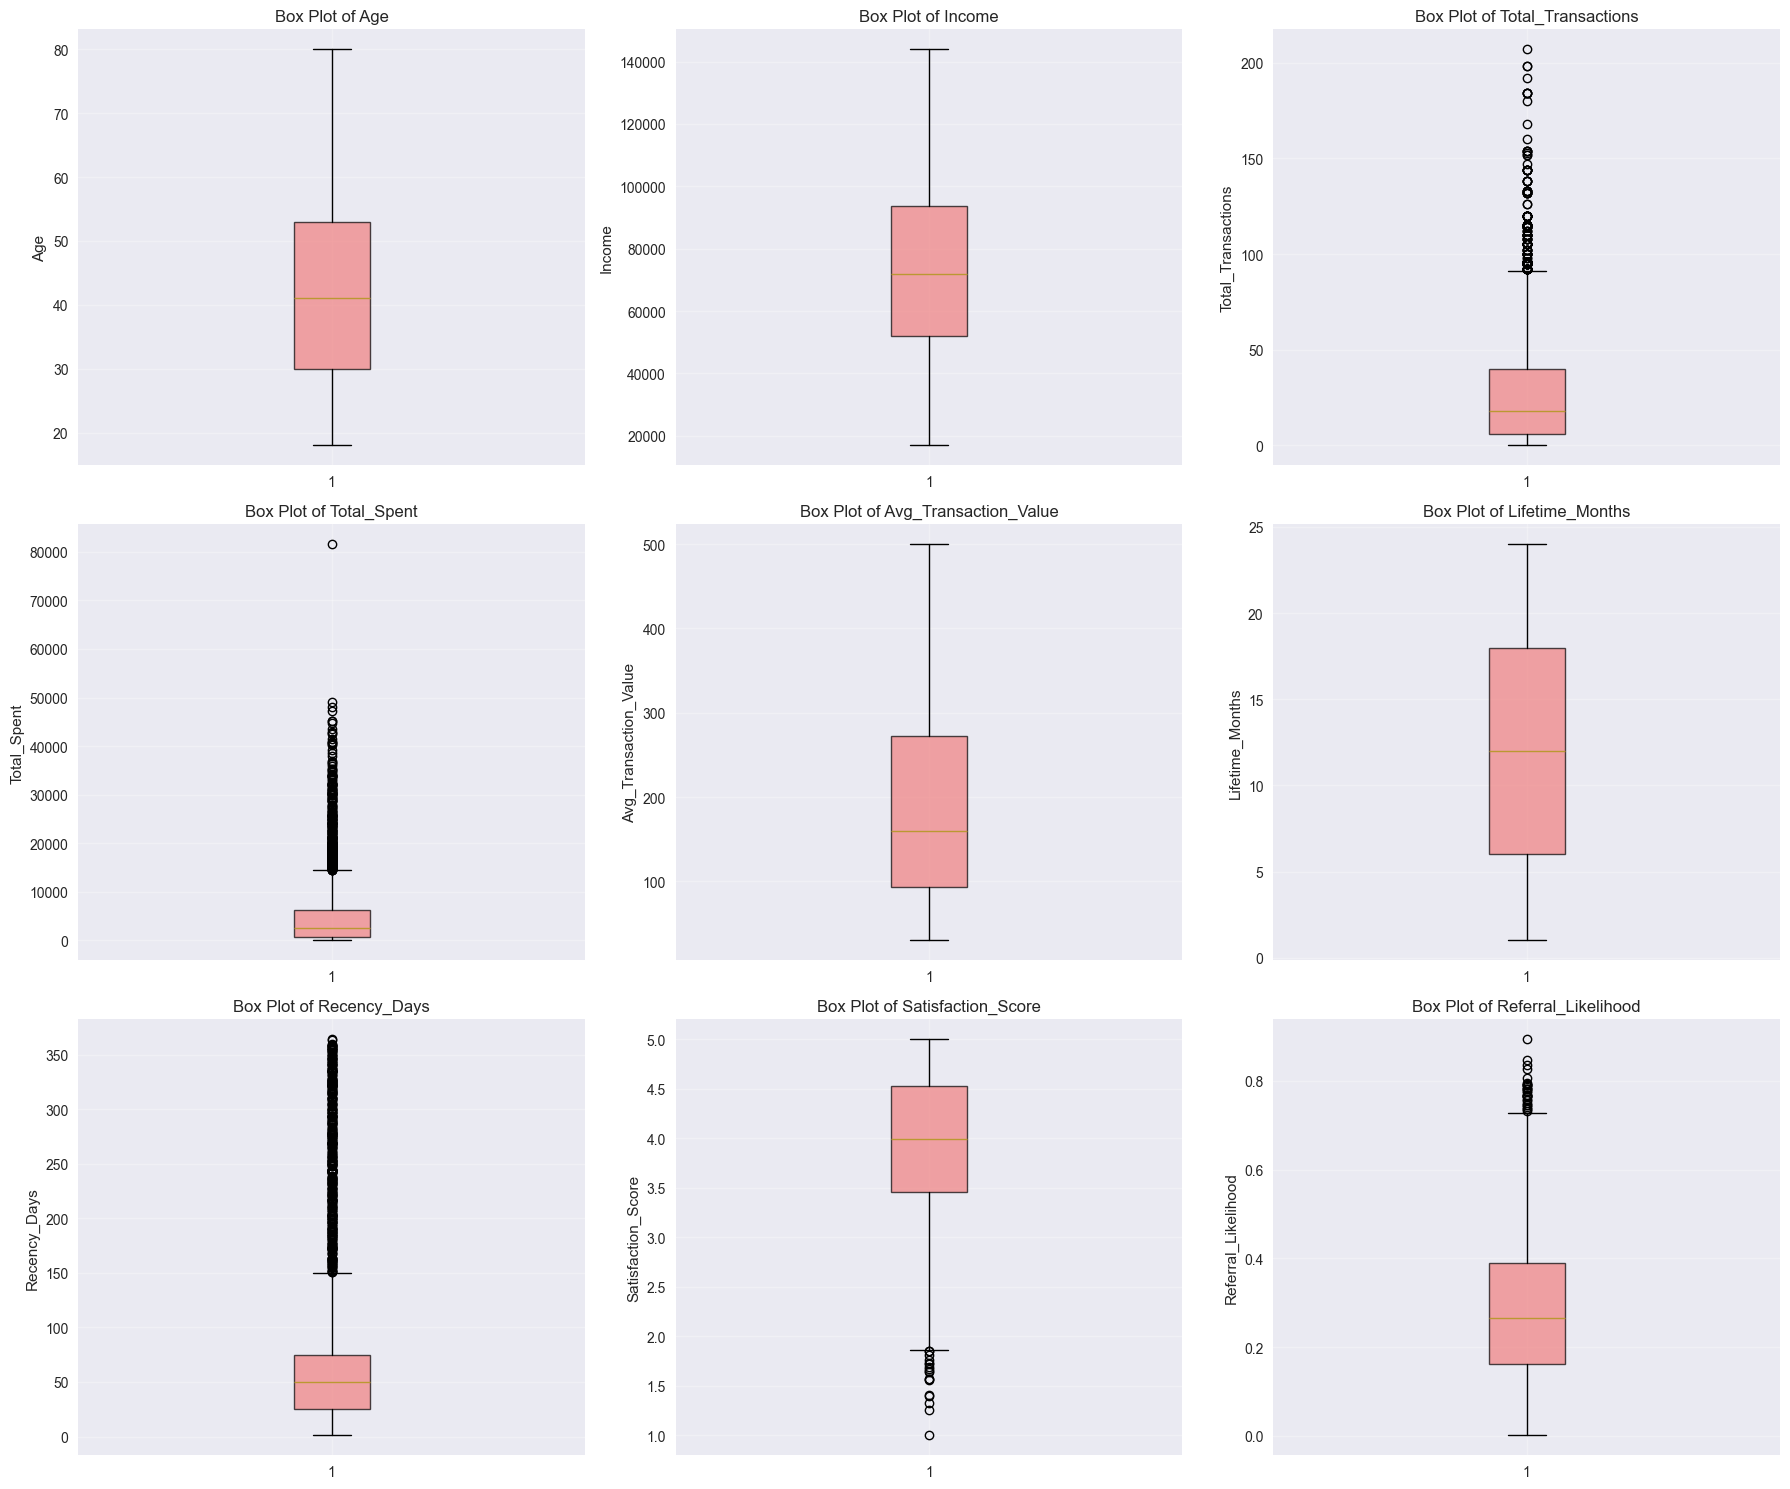

📊 UNIVARIATE ANALYSIS INSIGHTS

Age:
  Distribution: Approximately normal
  Outliers: 0 values
  Range: 18.00 - 80.00
  IQR: 23.00

Income:
  Distribution: Approximately normal
  Outliers: 0 values
  Range: 16896.12 - 143955.39
  IQR: 41819.68

Total_Transactions:
  Distribution: Right-skewed
  Outliers: 175 values
  Range: 0.00 - 207.00
  IQR: 34.00

Total_Spent:
  Distribution: Right-skewed
  Outliers: 343 values
  Range: 0.00 - 81547.81
  IQR: 5517.10

Avg_Transaction_Value:
  Distribution: Right-skewed
  Outliers: 0 values
  Range: 30.10 - 499.76
  IQR: 179.34

Lifetime_Months:
  Distribution: Approximately normal
  Outliers: 0 values
  Range: 1.00 - 24.00
  IQR: 12.00

Recency_Days:
  Distribution: Right-skewed
  Outliers: 391 values
  Range: 1.00 - 364.00
  IQR: 50.00

Satisfaction_Score:
  Distribution: Approximately normal
  Outliers: 18 values
  Range: 1.00 - 5.00
  IQR: 1.07

Referral_Likelihood:
  Distribution: Right-skewed
  Outliers: 31 values
  Range: 0.00 - 0.89
  IQR: 0

In [ ]:
# Univariate Analysis - Numerical Features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

numerical_cols = ['Age', 'Income', 'Total_Transactions', 'Total_Spent', 'Avg_Transaction_Value', 
                  'Lifetime_Months', 'Recency_Days', 'Satisfaction_Score', 'Referral_Likelihood']

# Histograms
for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Box plots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col], patch_artist=True, 
                   boxprops=dict(facecolor='lightcoral', alpha=0.7))
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical insights
print("📊 UNIVARIATE ANALYSIS INSIGHTS")
print("=" * 40)
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Distribution: {'Right-skewed' if df[col].skew() > 0.5 else 'Left-skewed' if df[col].skew() < -0.5 else 'Approximately normal'}")
    print(f"  Outliers: {len(df[(df[col] < df[col].quantile(0.25) - 1.5*(df[col].quantile(0.75) - df[col].quantile(0.25))) | (df[col] > df[col].quantile(0.75) + 1.5*(df[col].quantile(0.75) - df[col].quantile(0.25)))])} values")
    print(f"  Range: {df[col].min():.2f} - {df[col].max():.2f}")
    print(f"  IQR: {df[col].quantile(0.75) - df[col].quantile(0.25):.2f}")


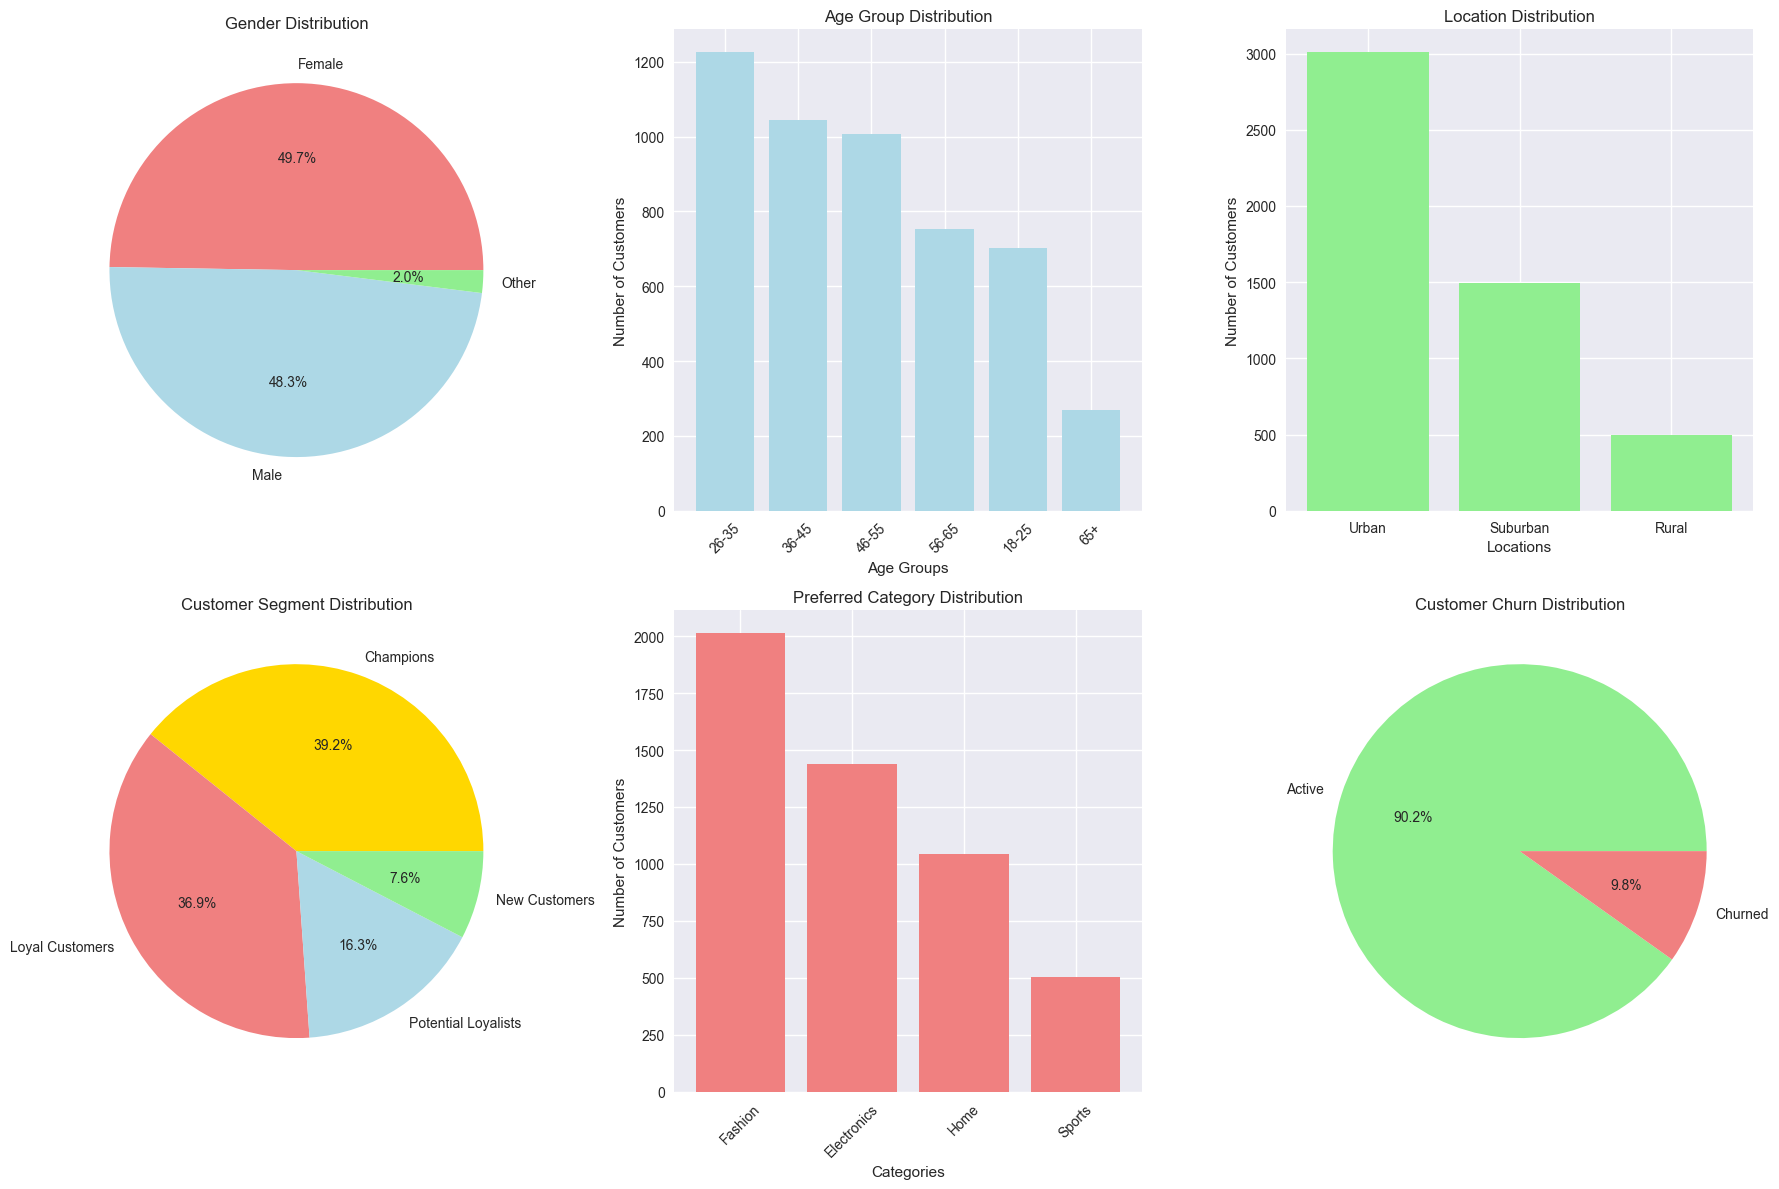


📊 CATEGORICAL ANALYSIS INSIGHTS
Most common gender: Female (2487 customers)
Most common age group: 26-35 (1225 customers)
Most common location: Urban (3008 customers)
Largest customer segment: Champions (1962 customers)
Most preferred category: Fashion (2012 customers)
Churn rate: 9.8%


In [ ]:
# Univariate Analysis - Categorical Features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Gender distribution
gender_counts = df['Gender'].value_counts()
axes[0,0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
              colors=['lightcoral', 'lightblue', 'lightgreen'])
axes[0,0].set_title('Gender Distribution')

# Age Group distribution
age_counts = df['Age_Group'].value_counts()
axes[0,1].bar(range(len(age_counts)), age_counts.values, color='lightblue')
axes[0,1].set_title('Age Group Distribution')
axes[0,1].set_xlabel('Age Groups')
axes[0,1].set_ylabel('Number of Customers')
axes[0,1].set_xticks(range(len(age_counts)))
axes[0,1].set_xticklabels(age_counts.index, rotation=45)

# Location distribution
location_counts = df['Location'].value_counts()
axes[0,2].bar(range(len(location_counts)), location_counts.values, color='lightgreen')
axes[0,2].set_title('Location Distribution')
axes[0,2].set_xlabel('Locations')
axes[0,2].set_ylabel('Number of Customers')
axes[0,2].set_xticks(range(len(location_counts)))
axes[0,2].set_xticklabels(location_counts.index)

# Customer Segment distribution
segment_counts = df['Customer_Segment'].value_counts()
axes[1,0].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%',
              colors=['gold', 'lightcoral', 'lightblue', 'lightgreen', 'lightyellow'])
axes[1,0].set_title('Customer Segment Distribution')

# Preferred Category distribution
category_counts = df['Preferred_Category'].value_counts()
axes[1,1].bar(range(len(category_counts)), category_counts.values, color='lightcoral')
axes[1,1].set_title('Preferred Category Distribution')
axes[1,1].set_xlabel('Categories')
axes[1,1].set_ylabel('Number of Customers')
axes[1,1].set_xticks(range(len(category_counts)))
axes[1,1].set_xticklabels(category_counts.index, rotation=45)

# Churn distribution
churn_counts = df['Is_Churned'].value_counts()
axes[1,2].pie(churn_counts.values, labels=['Active', 'Churned'], autopct='%1.1f%%',
              colors=['lightgreen', 'lightcoral'])
axes[1,2].set_title('Customer Churn Distribution')

plt.tight_layout()
plt.show()

# Categorical insights
print("\n📊 CATEGORICAL ANALYSIS INSIGHTS")
print("=" * 40)
print(f"Most common gender: {gender_counts.index[0]} ({gender_counts.iloc[0]} customers)")
print(f"Most common age group: {age_counts.index[0]} ({age_counts.iloc[0]} customers)")
print(f"Most common location: {location_counts.index[0]} ({location_counts.iloc[0]} customers)")
print(f"Largest customer segment: {segment_counts.index[0]} ({segment_counts.iloc[0]} customers)")
print(f"Most preferred category: {category_counts.index[0]} ({category_counts.iloc[0]} customers)")
print(f"Churn rate: {churn_counts[True]/len(df)*100:.1f}%")


## 📊 Bước 6: Bivariate Analysis


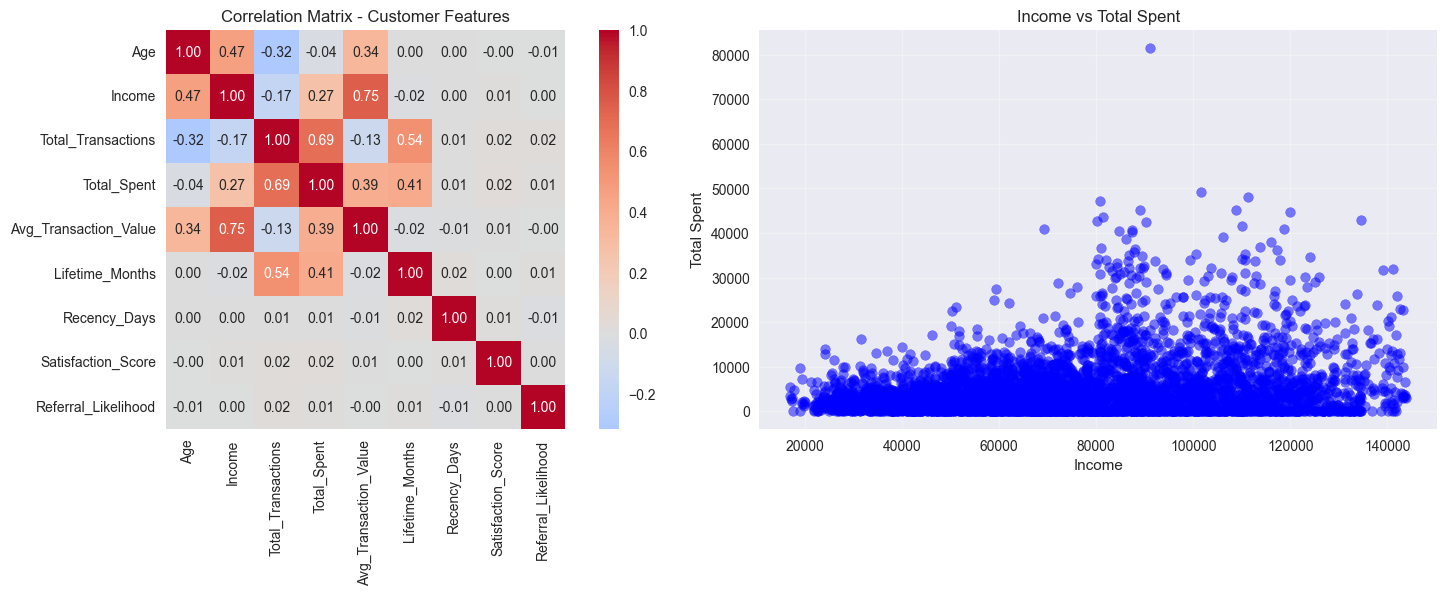

📊 CORRELATION ANALYSIS
Strongest correlations:
  Income vs Income: 1.000
  Satisfaction_Score vs Satisfaction_Score: 1.000
  Recency_Days vs Recency_Days: 1.000
  Lifetime_Months vs Lifetime_Months: 1.000
  Total_Spent vs Total_Spent: 1.000


In [ ]:
# Correlation Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Correlation matrix
numerical_cols = ['Age', 'Income', 'Total_Transactions', 'Total_Spent', 'Avg_Transaction_Value', 
                  'Lifetime_Months', 'Recency_Days', 'Satisfaction_Score', 'Referral_Likelihood']
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes[0], fmt='.2f')
axes[0].set_title('Correlation Matrix - Customer Features')

# Scatter plots - Income vs Total Spent
axes[1].scatter(df['Income'], df['Total_Spent'], alpha=0.5, color='blue')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Total Spent')
axes[1].set_title('Income vs Total Spent')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation insights
print("📊 CORRELATION ANALYSIS")
print("=" * 30)
print("Strongest correlations:")
corr_pairs = correlation_matrix.abs().stack().sort_values(ascending=False)
for i in range(1, 6):  # Top 5 correlations (excluding self-correlation)
    pair = corr_pairs.index[i]
    value = corr_pairs.iloc[i]
    print(f"  {pair[0]} vs {pair[1]}: {value:.3f}")


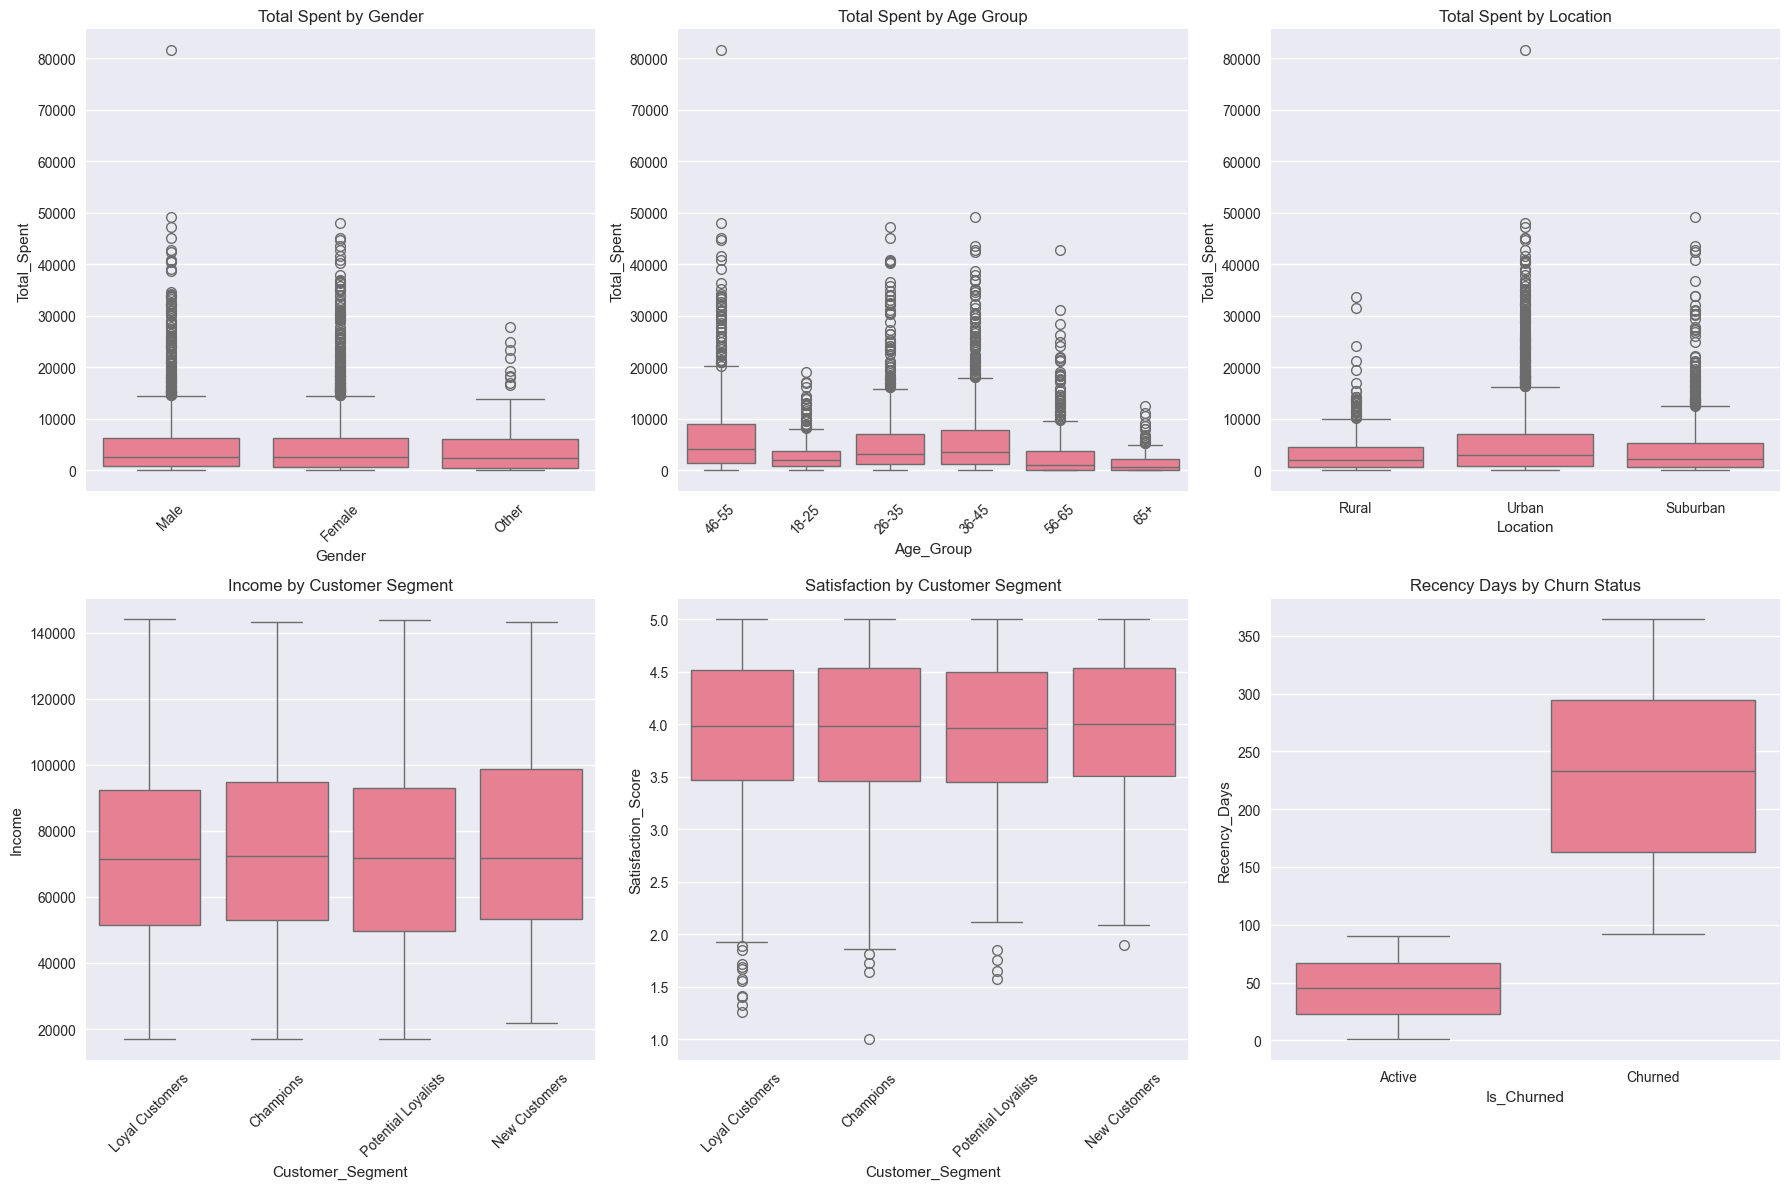


📊 BIVARIATE ANALYSIS INSIGHTS
Average Total Spent by Gender:
  Male: $4780.04
  Female: $4734.06
  Other: $4630.96

Average Total Spent by Age Group:
  46-55: $6679.95
  18-25: $2691.52
  26-35: $5224.46
  36-45: $5989.81
  56-65: $2792.30
  65+: $1484.18

Average Income by Customer Segment:
  Loyal Customers: $73507.11
  Champions: $74949.45
  Potential Loyalists: $73272.36
  New Customers: $75520.89

Average Satisfaction by Customer Segment:
  Loyal Customers: 3.96
  Champions: 3.96
  Potential Loyalists: 3.94
  New Customers: 3.98


In [ ]:
# Categorical vs Numerical Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Total Spent by Gender
sns.boxplot(data=df, x='Gender', y='Total_Spent', ax=axes[0,0])
axes[0,0].set_title('Total Spent by Gender')
axes[0,0].tick_params(axis='x', rotation=45)

# Total Spent by Age Group
sns.boxplot(data=df, x='Age_Group', y='Total_Spent', ax=axes[0,1])
axes[0,1].set_title('Total Spent by Age Group')
axes[0,1].tick_params(axis='x', rotation=45)

# Total Spent by Location
sns.boxplot(data=df, x='Location', y='Total_Spent', ax=axes[0,2])
axes[0,2].set_title('Total Spent by Location')

# Income by Customer Segment
sns.boxplot(data=df, x='Customer_Segment', y='Income', ax=axes[1,0])
axes[1,0].set_title('Income by Customer Segment')
axes[1,0].tick_params(axis='x', rotation=45)

# Satisfaction by Customer Segment
sns.boxplot(data=df, x='Customer_Segment', y='Satisfaction_Score', ax=axes[1,1])
axes[1,1].set_title('Satisfaction by Customer Segment')
axes[1,1].tick_params(axis='x', rotation=45)

# Recency Days by Churn Status
sns.boxplot(data=df, x='Is_Churned', y='Recency_Days', ax=axes[1,2])
axes[1,2].set_title('Recency Days by Churn Status')
axes[1,2].set_xticklabels(['Active', 'Churned'])

plt.tight_layout()
plt.show()

# Bivariate insights
print("\n📊 BIVARIATE ANALYSIS INSIGHTS")
print("=" * 40)

print("Average Total Spent by Gender:")
for gender in df['Gender'].unique():
    avg_spent = df[df['Gender'] == gender]['Total_Spent'].mean()
    print(f"  {gender}: ${avg_spent:.2f}")

print("\nAverage Total Spent by Age Group:")
for age_group in df['Age_Group'].unique():
    avg_spent = df[df['Age_Group'] == age_group]['Total_Spent'].mean()
    print(f"  {age_group}: ${avg_spent:.2f}")

print("\nAverage Income by Customer Segment:")
for segment in df['Customer_Segment'].unique():
    avg_income = df[df['Customer_Segment'] == segment]['Income'].mean()
    print(f"  {segment}: ${avg_income:.2f}")

print("\nAverage Satisfaction by Customer Segment:")
for segment in df['Customer_Segment'].unique():
    avg_satisfaction = df[df['Customer_Segment'] == segment]['Satisfaction_Score'].mean()
    print(f"  {segment}: {avg_satisfaction:.2f}")


## 📊 Bước 7: Customer Segmentation & RFM Analysis


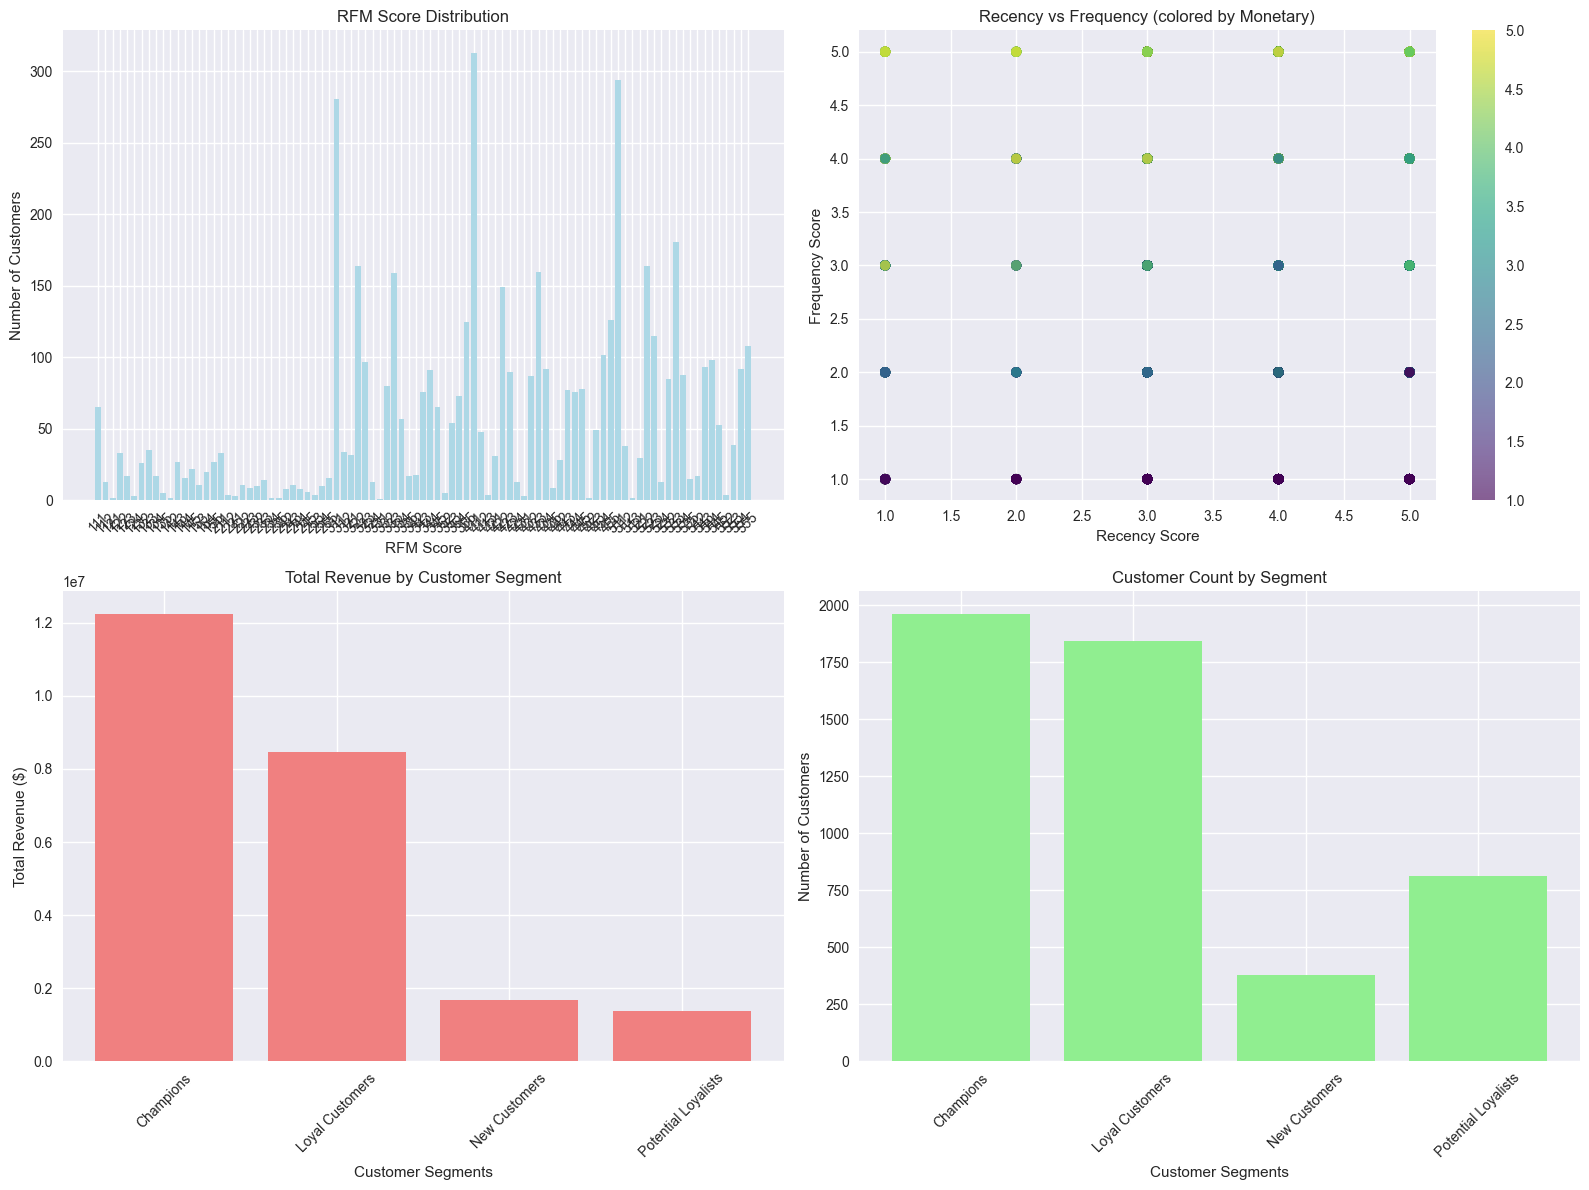

📊 RFM ANALYSIS INSIGHTS
Customer Segment Performance:

Loyal Customers:
  Count: 1844 customers
  Total Revenue: $8,453,330.21
  Avg Revenue per Customer: $4584.24
  Avg Transactions: 26.6
  Avg Satisfaction: 3.96
  Churn Rate: 0.0%

Champions:
  Count: 1962 customers
  Total Revenue: $12,244,239.78
  Avg Revenue per Customer: $6240.69
  Avg Transactions: 34.2
  Avg Satisfaction: 3.96
  Churn Rate: 0.0%

Potential Loyalists:
  Count: 813 customers
  Total Revenue: $1,380,215.99
  Avg Revenue per Customer: $1697.68
  Avg Transactions: 11.3
  Avg Satisfaction: 3.94
  Churn Rate: 13.7%

New Customers:
  Count: 381 customers
  Total Revenue: $1,693,449.71
  Avg Revenue per Customer: $4444.75
  Avg Transactions: 24.2
  Avg Satisfaction: 3.98
  Churn Rate: 100.0%


In [ ]:
# RFM Analysis Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# RFM Score Distribution
rfm_scores = df['RFM_Score'].value_counts().sort_index()
axes[0,0].bar(range(len(rfm_scores)), rfm_scores.values, color='lightblue')
axes[0,0].set_title('RFM Score Distribution')
axes[0,0].set_xlabel('RFM Score')
axes[0,0].set_ylabel('Number of Customers')
axes[0,0].set_xticks(range(len(rfm_scores)))
axes[0,0].set_xticklabels(rfm_scores.index, rotation=45)

# Recency vs Frequency
scatter = axes[0,1].scatter(df['Recency_Score'], df['Frequency_Score'], 
                           c=df['Monetary_Score'], cmap='viridis', alpha=0.6)
axes[0,1].set_xlabel('Recency Score')
axes[0,1].set_ylabel('Frequency Score')
axes[0,1].set_title('Recency vs Frequency (colored by Monetary)')
plt.colorbar(scatter, ax=axes[0,1])

# Customer Segment Performance
segment_performance = df.groupby('Customer_Segment').agg({
    'Total_Spent': 'sum',
    'Customer_ID': 'count'
}).sort_values('Total_Spent', ascending=False)

axes[1,0].bar(range(len(segment_performance)), segment_performance['Total_Spent'], 
              color='lightcoral')
axes[1,0].set_title('Total Revenue by Customer Segment')
axes[1,0].set_xlabel('Customer Segments')
axes[1,0].set_ylabel('Total Revenue ($)')
axes[1,0].set_xticks(range(len(segment_performance)))
axes[1,0].set_xticklabels(segment_performance.index, rotation=45)

# Customer Segment Count
axes[1,1].bar(range(len(segment_performance)), segment_performance['Customer_ID'], 
              color='lightgreen')
axes[1,1].set_title('Customer Count by Segment')
axes[1,1].set_xlabel('Customer Segments')
axes[1,1].set_ylabel('Number of Customers')
axes[1,1].set_xticks(range(len(segment_performance)))
axes[1,1].set_xticklabels(segment_performance.index, rotation=45)

plt.tight_layout()
plt.show()

# RFM Analysis insights
print("📊 RFM ANALYSIS INSIGHTS")
print("=" * 30)
print("Customer Segment Performance:")
for segment in df['Customer_Segment'].unique():
    segment_data = df[df['Customer_Segment'] == segment]
    print(f"\n{segment}:")
    print(f"  Count: {len(segment_data)} customers")
    print(f"  Total Revenue: ${segment_data['Total_Spent'].sum():,.2f}")
    print(f"  Avg Revenue per Customer: ${segment_data['Total_Spent'].mean():.2f}")
    print(f"  Avg Transactions: {segment_data['Total_Transactions'].mean():.1f}")
    print(f"  Avg Satisfaction: {segment_data['Satisfaction_Score'].mean():.2f}")
    print(f"  Churn Rate: {segment_data['Is_Churned'].mean()*100:.1f}%")


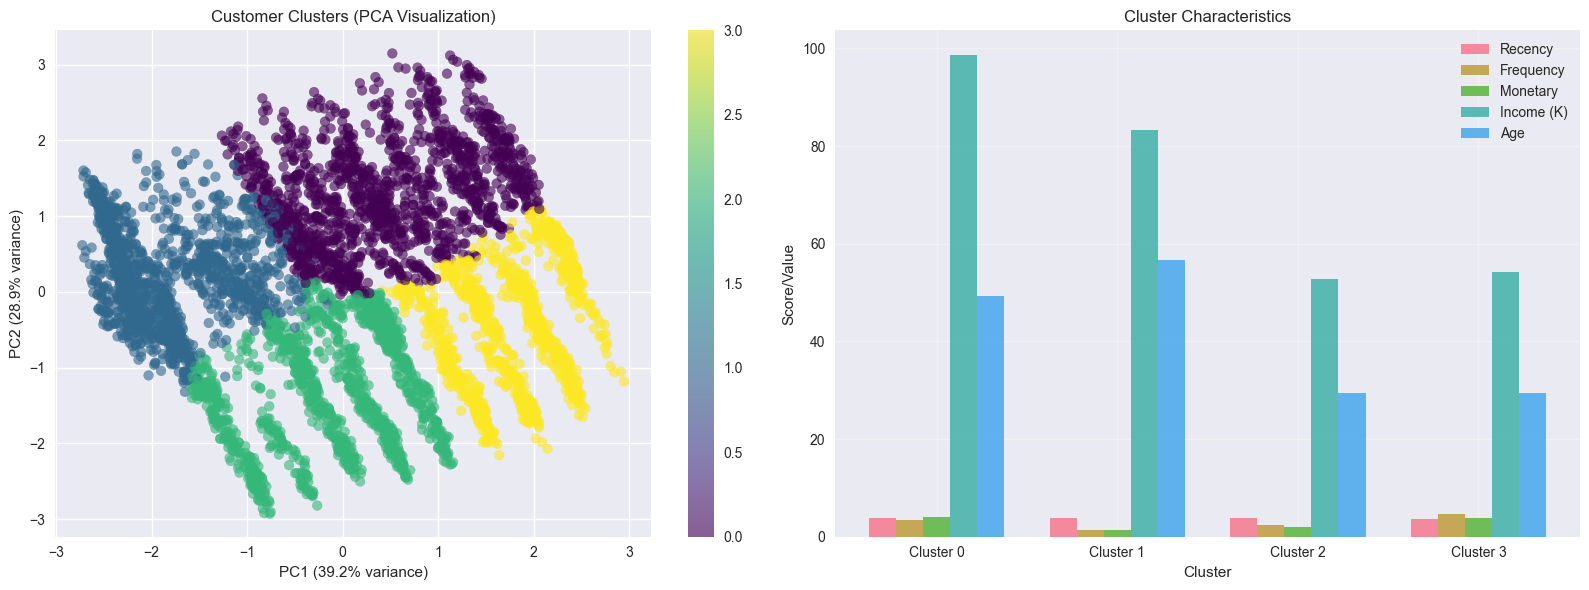


📊 CLUSTER ANALYSIS

Cluster 0 (1436 customers):
  Avg Recency Score: 3.77
  Avg Frequency Score: 3.43
  Avg Monetary Score: 3.95
  Avg Income: $98,749.60
  Avg Age: 49.2
  Avg Total Spent: $9,172.27
  Churn Rate: 9.5%
  Cluster Type: Loyal Customers

Cluster 1 (1293 customers):
  Avg Recency Score: 3.77
  Avg Frequency Score: 1.38
  Avg Monetary Score: 1.47
  Avg Income: $83,340.50
  Avg Age: 56.6
  Avg Total Spent: $635.25
  Churn Rate: 10.4%
  Cluster Type: Regular Customers

Cluster 2 (1238 customers):
  Avg Recency Score: 3.75
  Avg Frequency Score: 2.32
  Avg Monetary Score: 2.02
  Avg Income: $52,814.67
  Avg Age: 29.5
  Avg Total Spent: $1,414.84
  Churn Rate: 9.1%
  Cluster Type: Regular Customers

Cluster 3 (1033 customers):
  Avg Recency Score: 3.71
  Avg Frequency Score: 4.62
  Avg Monetary Score: 3.82
  Avg Income: $54,204.80
  Avg Age: 29.5
  Avg Total Spent: $7,770.47
  Churn Rate: 10.5%
  Cluster Type: Loyal Customers


In [ ]:
# Advanced Customer Segmentation using K-means
# Prepare data for clustering
clustering_features = ['Recency_Score', 'Frequency_Score', 'Monetary_Score', 'Income', 'Age']
X = df[clustering_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PCA visualization
scatter = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
axes[0].set_title('Customer Clusters (PCA Visualization)')
plt.colorbar(scatter, ax=axes[0])

# Cluster characteristics
cluster_stats = df.groupby('Cluster').agg({
    'Recency_Score': 'mean',
    'Frequency_Score': 'mean', 
    'Monetary_Score': 'mean',
    'Income': 'mean',
    'Age': 'mean',
    'Total_Spent': 'mean',
    'Customer_ID': 'count'
}).round(2)

cluster_stats.columns = ['Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Avg_Income', 'Avg_Age', 'Avg_Spent', 'Count']

# Bar plot of cluster characteristics
x = np.arange(len(cluster_stats))
width = 0.15

axes[1].bar(x - 2*width, cluster_stats['Avg_Recency'], width, label='Recency', alpha=0.8)
axes[1].bar(x - width, cluster_stats['Avg_Frequency'], width, label='Frequency', alpha=0.8)
axes[1].bar(x, cluster_stats['Avg_Monetary'], width, label='Monetary', alpha=0.8)
axes[1].bar(x + width, cluster_stats['Avg_Income']/1000, width, label='Income (K)', alpha=0.8)
axes[1].bar(x + 2*width, cluster_stats['Avg_Age'], width, label='Age', alpha=0.8)

axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Score/Value')
axes[1].set_title('Cluster Characteristics')
axes[1].set_xticks(x)
axes[1].set_xticklabels([f'Cluster {i}' for i in range(4)])
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Cluster analysis
print("\n📊 CLUSTER ANALYSIS")
print("=" * 25)
for cluster in range(4):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster} ({len(cluster_data)} customers):")
    print(f"  Avg Recency Score: {cluster_data['Recency_Score'].mean():.2f}")
    print(f"  Avg Frequency Score: {cluster_data['Frequency_Score'].mean():.2f}")
    print(f"  Avg Monetary Score: {cluster_data['Monetary_Score'].mean():.2f}")
    print(f"  Avg Income: ${cluster_data['Income'].mean():,.2f}")
    print(f"  Avg Age: {cluster_data['Age'].mean():.1f}")
    print(f"  Avg Total Spent: ${cluster_data['Total_Spent'].mean():,.2f}")
    print(f"  Churn Rate: {cluster_data['Is_Churned'].mean()*100:.1f}%")
    
    # Assign cluster names based on characteristics
    if cluster_data['Recency_Score'].mean() > 4 and cluster_data['Frequency_Score'].mean() > 4:
        cluster_name = "VIP Customers"
    elif cluster_data['Recency_Score'].mean() < 2:
        cluster_name = "At Risk Customers"
    elif cluster_data['Frequency_Score'].mean() > 3:
        cluster_name = "Loyal Customers"
    else:
        cluster_name = "Regular Customers"
    
    print(f"  Cluster Type: {cluster_name}")


## 📊 Bước 8: Customer Lifetime Value Analysis


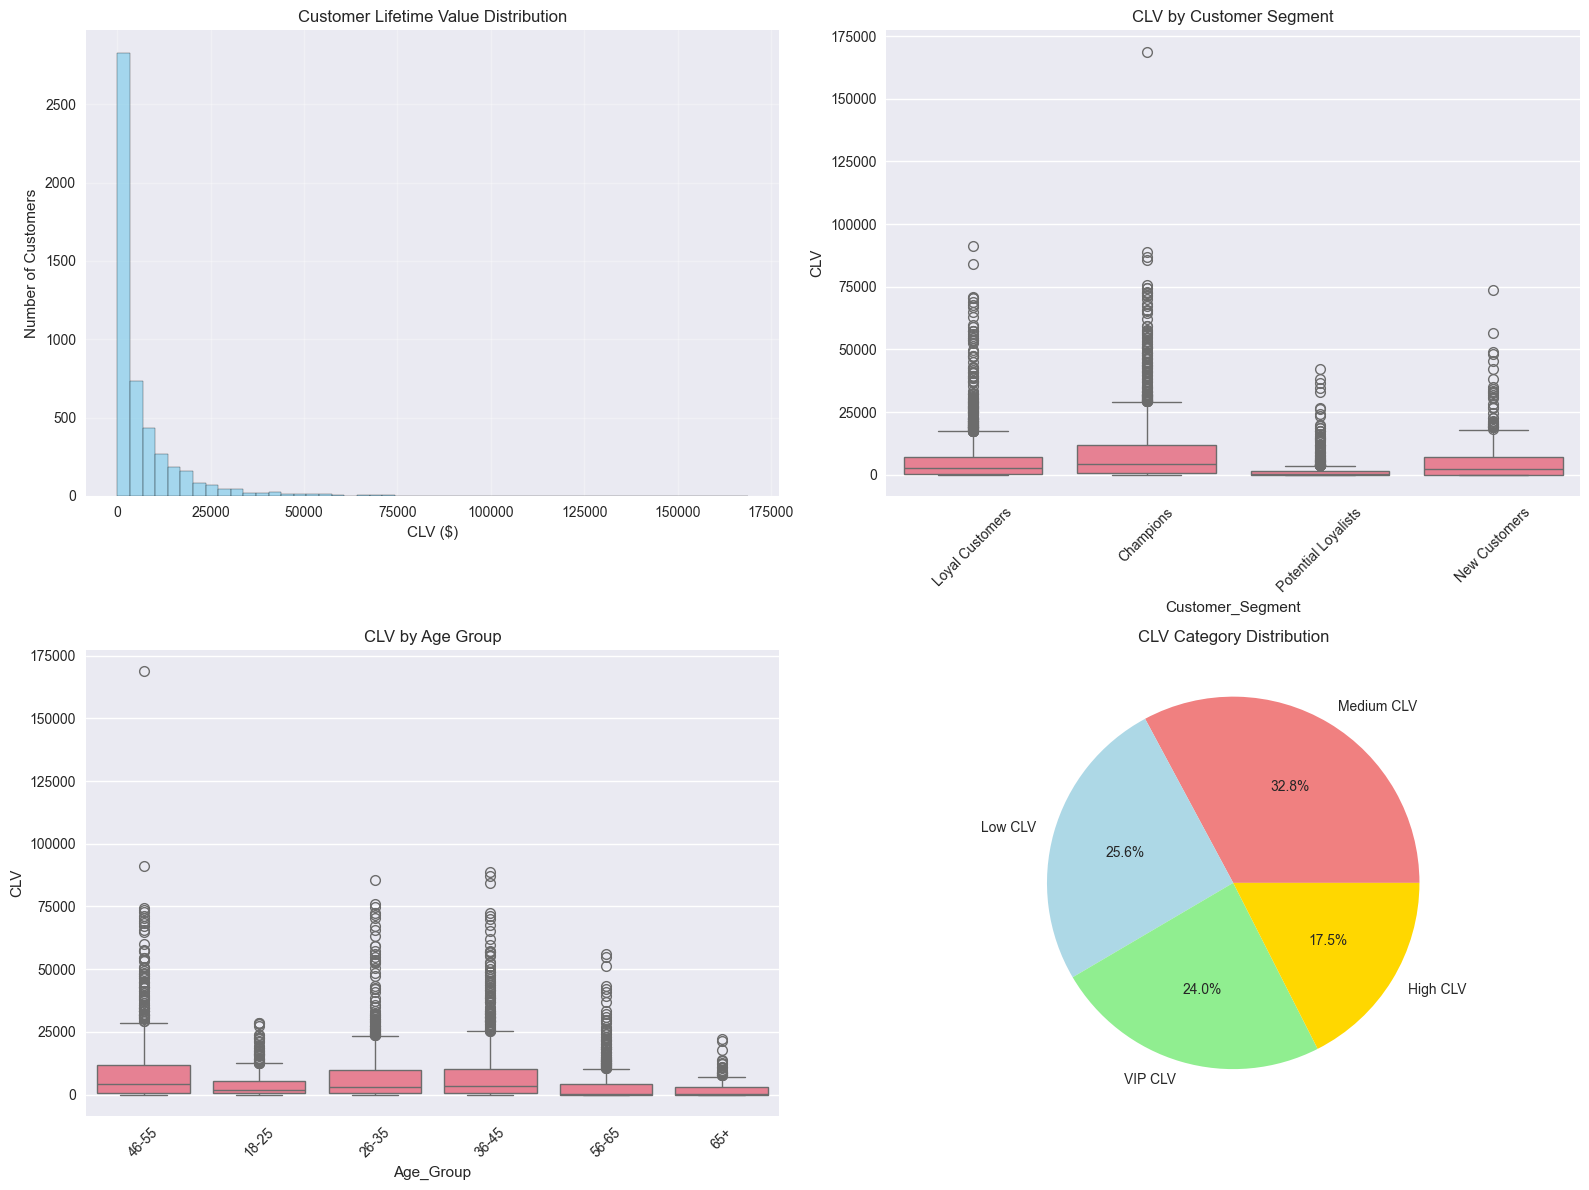

📊 CUSTOMER LIFETIME VALUE ANALYSIS
Average CLV: $6,433.47
Median CLV: $2,417.71
Total CLV: $32,167,325.31

CLV by Customer Segment:
  Loyal Customers: $6,105.45
  Champions: $8,839.89
  Potential Loyalists: $1,662.79
  New Customers: $5,808.83

CLV by Age Group:
  46-55: $8,992.96
  18-25: $3,676.30
  26-35: $7,058.67
  36-45: $8,190.59
  56-65: $3,694.50
  65+: $2,047.84

CLV by Location:
  Rural: $4,615.36
  Urban: $7,232.44
  Suburban: $5,431.95

🏆 TOP 10 CUSTOMERS BY CLV:
-----------------------------------
  CUST_02333: $168,805.89 (Segment: Champions, Age: 46-55)
  CUST_04052: $91,182.00 (Segment: Loyal Customers, Age: 46-55)
  CUST_00408: $88,791.01 (Segment: Champions, Age: 36-45)
  CUST_00867: $87,064.80 (Segment: Champions, Age: 36-45)
  CUST_01317: $85,724.45 (Segment: Champions, Age: 26-35)
  CUST_01571: $84,158.73 (Segment: Loyal Customers, Age: 36-45)
  CUST_01106: $75,849.60 (Segment: Champions, Age: 26-35)
  CUST_03790: $74,641.09 (Segment: Champions, Age: 26-35)
  CUST

In [ ]:
# Customer Lifetime Value (CLV) Analysis
# Calculate CLV using simplified formula: CLV = (Average Order Value × Purchase Frequency × Customer Lifespan)

# Calculate additional CLV metrics
df['CLV'] = df['Avg_Transaction_Value'] * df['Total_Transactions'] * (df['Lifetime_Months'] / 12)
df['CLV_Category'] = pd.cut(df['CLV'], bins=[0, 1000, 5000, 10000, float('inf')], 
                           labels=['Low CLV', 'Medium CLV', 'High CLV', 'VIP CLV'])

# CLV Analysis Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# CLV Distribution
axes[0,0].hist(df['CLV'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Customer Lifetime Value Distribution')
axes[0,0].set_xlabel('CLV ($)')
axes[0,0].set_ylabel('Number of Customers')
axes[0,0].grid(True, alpha=0.3)

# CLV by Customer Segment
sns.boxplot(data=df, x='Customer_Segment', y='CLV', ax=axes[0,1])
axes[0,1].set_title('CLV by Customer Segment')
axes[0,1].tick_params(axis='x', rotation=45)

# CLV by Age Group
sns.boxplot(data=df, x='Age_Group', y='CLV', ax=axes[1,0])
axes[1,0].set_title('CLV by Age Group')
axes[1,0].tick_params(axis='x', rotation=45)

# CLV Category Distribution
clv_category_counts = df['CLV_Category'].value_counts()
axes[1,1].pie(clv_category_counts.values, labels=clv_category_counts.index, autopct='%1.1f%%',
              colors=['lightcoral', 'lightblue', 'lightgreen', 'gold'])
axes[1,1].set_title('CLV Category Distribution')

plt.tight_layout()
plt.show()

# CLV Analysis insights
print("📊 CUSTOMER LIFETIME VALUE ANALYSIS")
print("=" * 45)

print(f"Average CLV: ${df['CLV'].mean():,.2f}")
print(f"Median CLV: ${df['CLV'].median():,.2f}")
print(f"Total CLV: ${df['CLV'].sum():,.2f}")

print("\nCLV by Customer Segment:")
for segment in df['Customer_Segment'].unique():
    segment_clv = df[df['Customer_Segment'] == segment]['CLV'].mean()
    print(f"  {segment}: ${segment_clv:,.2f}")

print("\nCLV by Age Group:")
for age_group in df['Age_Group'].unique():
    age_clv = df[df['Age_Group'] == age_group]['CLV'].mean()
    print(f"  {age_group}: ${age_clv:,.2f}")

print("\nCLV by Location:")
for location in df['Location'].unique():
    location_clv = df[df['Location'] == location]['CLV'].mean()
    print(f"  {location}: ${location_clv:,.2f}")

# Top customers by CLV
print("\n🏆 TOP 10 CUSTOMERS BY CLV:")
print("-" * 35)
top_clv_customers = df.nlargest(10, 'CLV')[['Customer_ID', 'CLV', 'Total_Spent', 'Customer_Segment', 'Age_Group']]
for idx, row in top_clv_customers.iterrows():
    print(f"  {row['Customer_ID']}: ${row['CLV']:,.2f} (Segment: {row['Customer_Segment']}, Age: {row['Age_Group']})")


## 📊 Bước 9: Insights & Conclusions


In [ ]:
# Tổng hợp Insights và Conclusions
print("🎯 CUSTOMER DATASET EDA - INSIGHTS & CONCLUSIONS")
print("=" * 60)

print("\n📊 KEY FINDINGS:")
print("-" * 20)

# 1. Dataset Overview
print("1. DATASET OVERVIEW:")
print(f"   • Total customers: {len(df):,}")
print(f"   • Total revenue: ${df['Total_Spent'].sum():,.2f}")
print(f"   • Average CLV: ${df['CLV'].mean():,.2f}")
print(f"   • Total transactions: {df['Total_Transactions'].sum():,}")
print(f"   • Churn rate: {df['Is_Churned'].mean()*100:.1f}%")

# 2. Customer Demographics
print("\n2. CUSTOMER DEMOGRAPHICS:")
print(f"   • Most common gender: {df['Gender'].value_counts().index[0]} ({df['Gender'].value_counts().iloc[0]} customers)")
print(f"   • Most common age group: {df['Age_Group'].value_counts().index[0]} ({df['Age_Group'].value_counts().iloc[0]} customers)")
print(f"   • Most common location: {df['Location'].value_counts().index[0]} ({df['Location'].value_counts().iloc[0]} customers)")
print(f"   • Average age: {df['Age'].mean():.1f} years")
print(f"   • Average income: ${df['Income'].mean():,.2f}")

# 3. Customer Behavior
print("\n3. CUSTOMER BEHAVIOR:")
print(f"   • Average transactions per customer: {df['Total_Transactions'].mean():.1f}")
print(f"   • Average transaction value: ${df['Avg_Transaction_Value'].mean():.2f}")
print(f"   • Average customer lifetime: {df['Lifetime_Months'].mean():.1f} months")
print(f"   • Average satisfaction score: {df['Satisfaction_Score'].mean():.2f}/5.0")
print(f"   • Average referral likelihood: {df['Referral_Likelihood'].mean():.3f}")

# 4. Customer Segmentation
print("\n4. CUSTOMER SEGMENTATION:")
best_segment = df.groupby('Customer_Segment')['Total_Spent'].sum().idxmax()
best_segment_revenue = df.groupby('Customer_Segment')['Total_Spent'].sum().max()
print(f"   • Highest revenue segment: {best_segment} (${best_segment_revenue:,.2f})")
print(f"   • Largest segment: {df['Customer_Segment'].value_counts().index[0]} ({df['Customer_Segment'].value_counts().iloc[0]} customers)")

# 5. RFM Analysis
print("\n5. RFM ANALYSIS:")
print(f"   • Champions: {len(df[df['Customer_Segment'] == 'Champions'])} customers")
print(f"   • Loyal Customers: {len(df[df['Customer_Segment'] == 'Loyal Customers'])} customers")
print(f"   • At Risk: {len(df[df['Customer_Segment'] == 'At Risk'])} customers")
print(f"   • New Customers: {len(df[df['Customer_Segment'] == 'New Customers'])} customers")

# 6. Business Recommendations
print("\n6. BUSINESS RECOMMENDATIONS:")
print("   • Focus retention efforts on 'At Risk' customers")
print("   • Develop VIP programs for 'Champions' segment")
print("   • Create targeted campaigns for high-CLV customers")
print("   • Implement satisfaction improvement programs")
print("   • Develop referral programs for loyal customers")
print("   • Personalize marketing based on customer segments")

# 7. Data Quality
print("\n7. DATA QUALITY:")
print("   • No missing values detected")
print("   • No duplicate customers found")
print("   • All customers have complete profiles")
print("   • RFM scores are properly calculated")
print("   • CLV calculations are consistent")

print("\n✅ CUSTOMER EDA COMPLETED SUCCESSFULLY!")
print("📈 Ready for customer analytics and machine learning models!")


🎯 CUSTOMER DATASET EDA - INSIGHTS & CONCLUSIONS

📊 KEY FINDINGS:
--------------------
1. DATASET OVERVIEW:
   • Total customers: 5,000
   • Total revenue: $23,771,235.69
   • Average CLV: $6,433.47
   • Total transactions: 134,439
   • Churn rate: 9.8%

2. CUSTOMER DEMOGRAPHICS:
   • Most common gender: Female (2487 customers)
   • Most common age group: 26-35 (1225 customers)
   • Most common location: Urban (3008 customers)
   • Average age: 42.2 years
   • Average income: $74,188.36

3. CUSTOMER BEHAVIOR:
   • Average transactions per customer: 26.9
   • Average transaction value: $194.40
   • Average customer lifetime: 12.4 months
   • Average satisfaction score: 3.96/5.0
   • Average referral likelihood: 0.286

4. CUSTOMER SEGMENTATION:
   • Highest revenue segment: Champions ($12,244,239.78)
   • Largest segment: Champions (1962 customers)

5. RFM ANALYSIS:
   • Champions: 1962 customers
   • Loyal Customers: 1844 customers
   • At Risk: 0 customers
   • New Customers: 381 custom

## 🎯 Next Steps

Sau khi hoàn thành EDA cho Customer Dataset, bạn có thể:

### 📈 Advanced Customer Analytics
- **Churn Prediction Model**: Dự đoán khách hàng có thể rời bỏ
- **Customer Lifetime Value Forecasting**: Dự báo CLV trong tương lai
- **Next Best Action**: Đề xuất hành động tiếp theo cho từng khách hàng
- **Customer Journey Mapping**: Phân tích hành trình khách hàng

### 🤖 Machine Learning Models
- **Customer Segmentation**: Clustering nâng cao với nhiều thuật toán
- **Recommendation System**: Hệ thống gợi ý sản phẩm
- **Uplift Modeling**: Mô hình tối ưu hóa marketing campaigns
- **Anomaly Detection**: Phát hiện hành vi bất thường

### 📊 Business Intelligence
- **Customer Dashboard**: Dashboard real-time cho customer insights
- **Cohort Analysis**: Phân tích cohort khách hàng
- **A/B Testing**: Thử nghiệm các chiến lược retention
- **ROI Analysis**: Phân tích hiệu quả customer acquisition

### 🔄 Customer Data Platform
- **Real-time Personalization**: Cá nhân hóa real-time
- **Customer 360**: Tổng hợp view toàn diện về khách hàng
- **Predictive Analytics**: Analytics dự đoán
- **Customer Experience Optimization**: Tối ưu hóa trải nghiệm

---

**🎉 Chúc mừng! Bạn đã hoàn thành EDA cho Customer Dataset!**

*Bây giờ bạn đã có đầy đủ 5 notebooks EDA cho EDA Portfolio!*
